In [1]:
%pylab inline
import sys; sys.path.insert(0, "../")
import numpy as np
import time

from emcee.autocorr import *
from ensemble_sampler import *

Populating the interactive namespace from numpy and matplotlib


In [2]:
dim = 2
nwalkers = 10
niters = 10000

In [3]:
t_dist = Rosenbrock()
proposal = StretchMove(a=2.0)

In [4]:
sampler = Sampler(dim=dim, t_dist=t_dist, proposal=proposal, nwalkers=nwalkers)
start = time.time()
sampler.run_mcmc(niters, p0=np.random.randn(dim*nwalkers).reshape([nwalkers, dim]), batch_size=5, store=True)
print time.time() - start

2.19711399078


In [5]:
chain = sampler.history.get('chain')
chain = chain.reshape([niters*nwalkers, -1])

In [6]:
import seaborn as sns
from pandas import DataFrame

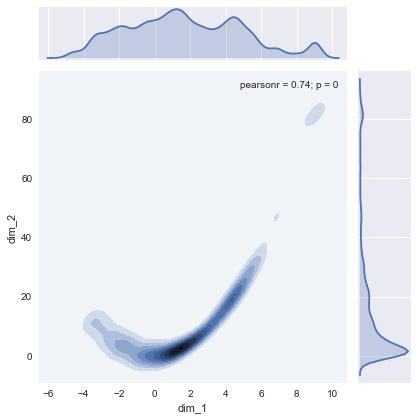

In [7]:
x, y = ['dim_1', 'dim_2']
df = DataFrame(np.vstack([chain[:, 0], chain[:, 1]]).T, columns=[x, y])
sns.jointplot(x=x, y=y, data=df, kind='kde')

In [8]:
import emcee
nwalkers = 4

In [9]:
class Rosenbrock(object):
    def __init__(self):
        self.a1 = 100.0
        self.a2 = 20.0

    def __call__(self, p):
        return -(self.a1 * (p[1] - p[0] ** 2) ** 2 + (1 - p[0]) ** 2) / self.a2

In [10]:
p0 = np.random.rand(nwalkers * dim).reshape(nwalkers, dim)

In [11]:
sampler = emcee.EnsembleSampler(4, 2, Rosenbrock())

In [12]:
start = time.time()
hist = sampler.run_mcmc(p0, N=10000)
print time.time() - start

1.79672288895


In [13]:
chain = sampler.flatchain

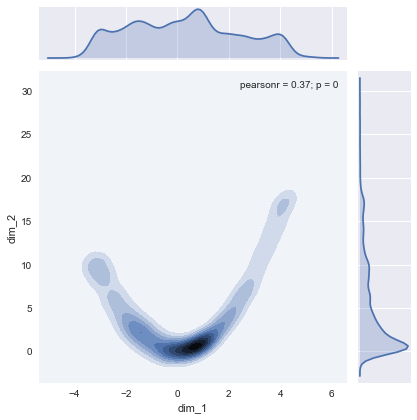

In [14]:
x, y = ['dim_1', 'dim_2']
df = DataFrame(np.vstack([chain[:, 0], chain[:, 1]]).T, columns=[x, y])
sns.jointplot(x=x, y=y, data=df, kind='kde')